In [47]:
#Read csvs and plot the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Encoder
from sklearn.preprocessing import LabelEncoder

In [48]:
isi_dist = pd.read_csv('ISI_dist.csv',index_col=0)
waveform = pd.read_csv('spikeWaveformsNormalized.csv',index_col=0)
celltypes = waveform["CellTypeNames"]
waveform = waveform.drop(columns=["CellTypeNames"])
X_columns = [column for column in waveform.columns if column.startswith('X')]
Y_columns = [column for column in waveform.columns if column.startswith('Y')]

waveform_y = waveform[Y_columns]
waveform_x = waveform[X_columns]

In [49]:
isi_dist = isi_dist.T

In [50]:
#Convert to numpy arrays
isi_dist = isi_dist.to_numpy()
waveform = waveform.to_numpy()
waveform_x = waveform_x.to_numpy()
waveform_y = waveform_y.to_numpy()
celltypes = celltypes.to_numpy()
print(np.unique(celltypes))
#Encode celltypes as scalars
le = LabelEncoder()
le.fit(celltypes)
celltypes = le.transform(celltypes)


['Axo_' 'Juxt' 'PV' 'Pyra' 'SST' 'VGAT' 'VIP']


In [51]:
#celltypes

In [52]:
#Remove all the values after the first 100 points per isi_dist
isi_dist = isi_dist[:,:100]

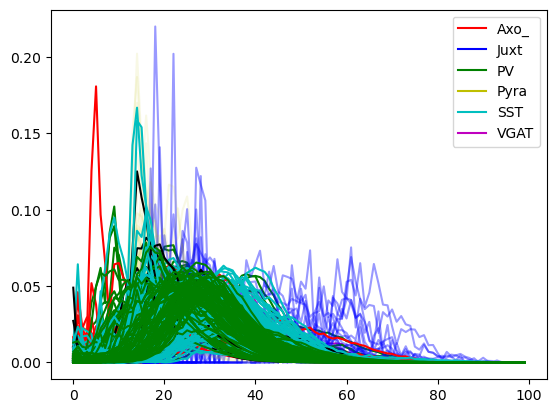

In [53]:
#Plot isi_dist Normalize per sample so that its proportional to 1
plt.figure()
#plt.plot(isi_dist[0,:]/isi_dist[0,:].sum())
color = ['r','b','g','y','c','m','k','w']

for i in range(isi_dist.shape[0]):
    color_idx = celltypes[i]
    #Normalize isi_dist
    hist = isi_dist[i,:]/isi_dist[i,:].sum()
    if color_idx ==3:
        plt.plot(hist,color=color[color_idx],alpha=0.1)
    elif color_idx ==1:
        plt.plot(hist,color=color[color_idx],alpha=0.4)
    else:
        plt.plot(hist,color=color[color_idx],alpha=1)

for i in range(6):
    plt.plot(0,0,color[i],label=le.inverse_transform([i])[0])

plt.legend()


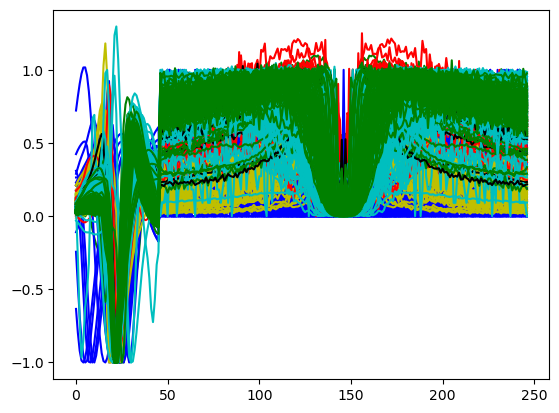

In [54]:
#Plot waveform

plt.figure()
for i in range(waveform.shape[0]):
    color_idx = celltypes[i]
    plt.plot(waveform[i,:],color=color[color_idx])

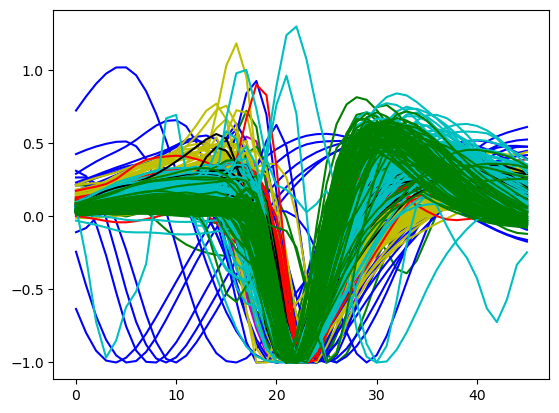

In [55]:
#Plot waveform

plt.figure()
for i in range(waveform.shape[0]):
    color_idx = celltypes[i]
    plt.plot(waveform_x[i,:],color=color[color_idx])

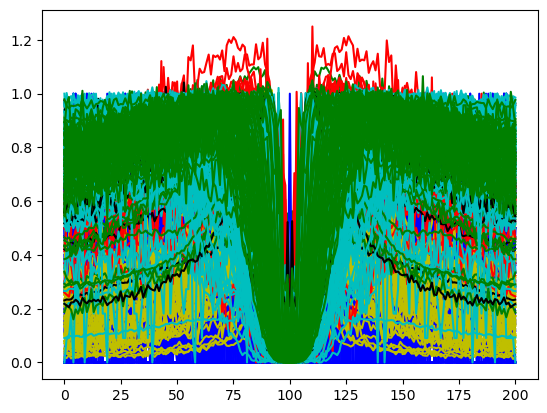

In [56]:
plt.figure()
for i in range(waveform.shape[0]):
    color_idx = celltypes[i]
    plt.plot(waveform_y[i,:],color=color[color_idx])

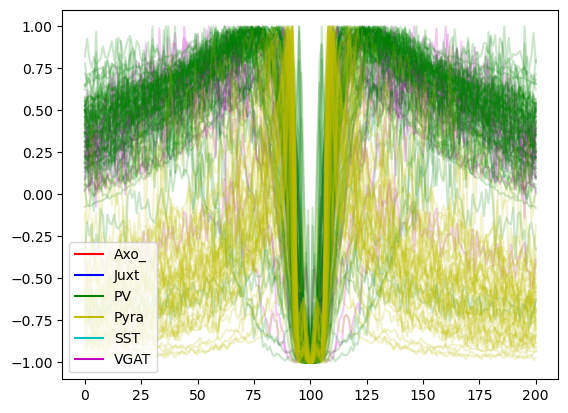

In [63]:
#normalize waveform_y between 1 and -1
waveform_y_list = []
for waveform in waveform_y:
    waveform = (waveform - waveform.min())/(waveform.max() - waveform.min())
    waveform = waveform*2 - 1
    waveform_y_list.append(waveform)
plt.figure()
for i in range(waveform.shape[0]):
    color_idx = celltypes[i]
    if color_idx not in [0,1]:
        plt.plot(waveform_y_list[i],color=color[color_idx],alpha=0.2)


for i in range(6):
    plt.plot(0,0,color[i],label=le.inverse_transform([i])[0])

plt.legend()
